# Importing Libraries

In [41]:
# Dataframe operation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix, plot_roc_curve, roc_curve, auc
from sklearn.preprocessing import binarize
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import time

pd.set_option('display.max_columns', None)

# Question 2A 
# EDA - Exploratory Data Analysis

In [42]:
df = pd.read_csv("hotel_bookings.csv")

In [43]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


From the summary statistics i can see there are lot of null values and potential ouliers. A more clear understanding of these assumptions can be obtained by using visualizations.

In [45]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**Data types:**
* Numerical - lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, previous_bookings_not_canceled, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests

* Categorical - hotel, customer_type, is_repeated_guest, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, reservation_status

* Ordinal - arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month,  reservation_status_date

**Target variable:**
* is_cancelled = 0(Not cancelled)
* is_cancelled = 1(cancelled)

# Correlation Heat map

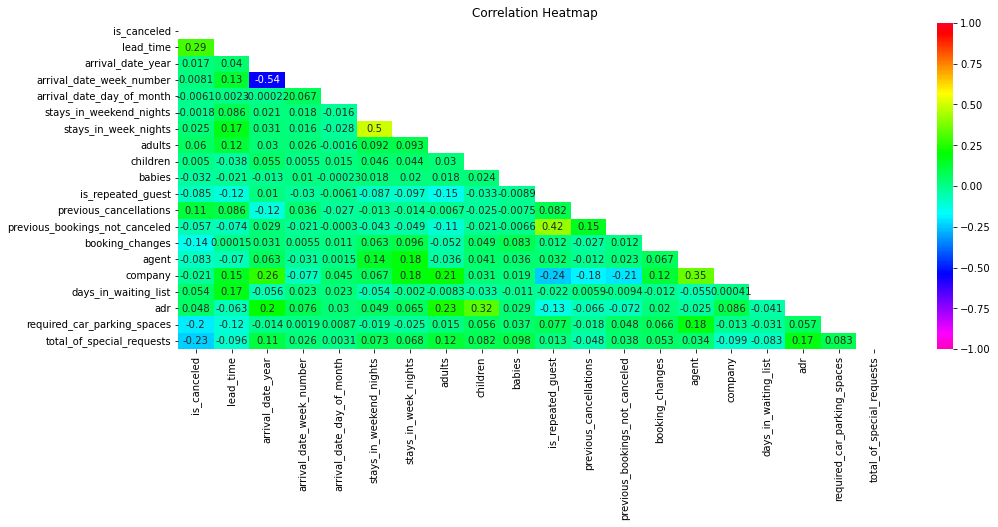

In [46]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, mask=mask, annot=True, cmap='gist_rainbow_r')

heatmap.set_title('Correlation Heatmap');

In [47]:
corr= df.corr(method='pearson')['is_canceled'][:]
corr

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

From the above correlation heat map and pearson correlation i can say that the variables **lead_time** and **total_of_special_requests** has the highest correlation

# Question 2B(ii)
# Identifying missing values

In [48]:
# This shows us the percentage of the missing values per column
missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [49]:
missing_percentages = missing_percentages[missing_percentages !=0]

<AxesSubplot:>

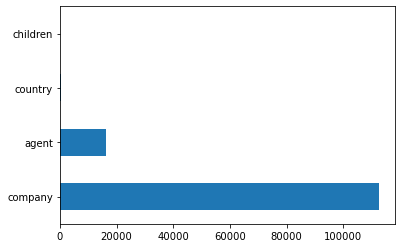

In [50]:
missing_percentages[missing_percentages !=0].plot(kind='barh')

From the above analysis we can see **company**, **agent**, **children** and **country** have missing values among which **company** and **agent** have the highest percentage of missing values

In [51]:
# Based on hotel types
hotel_type = df.hotel.unique()
len(hotel_type)

2

In [52]:
hotel_type = df.hotel.value_counts().sort_values(ascending=False)
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

<AxesSubplot:>

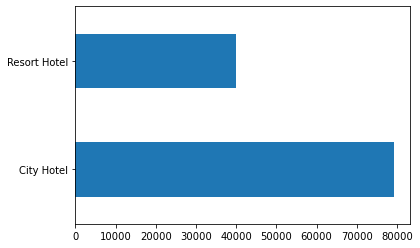

In [53]:
hotel_type[:20].plot(kind='barh')

From the above plot we can see more cancellations are happening in city hotels. This might be because of the fact that the people ar having more hotel options to choose from.

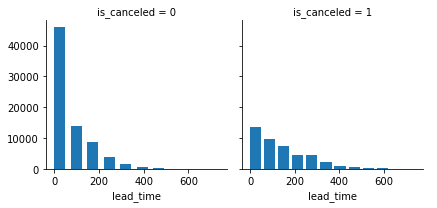

In [54]:
# Cancellations based on lead time
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()

From the correlation heat map we know that lead time has high correlation with the target variable. From the above plot we can see that many cancellations happend as we get closer to the date of stay. In other words as the lead_time decreases number of cancellationss increases.

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

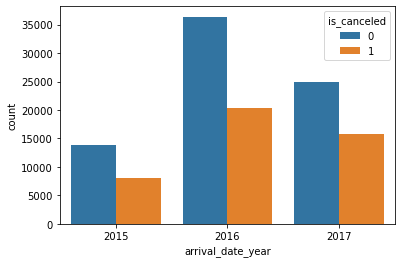

In [55]:
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

From the above plot we can see that the maximum number of cancellations occured in 2016 in comparison with the number of bookings 

# Question 2B(iii)
# To check outliers

<AxesSubplot:xlabel='market_segment', ylabel='lead_time'>

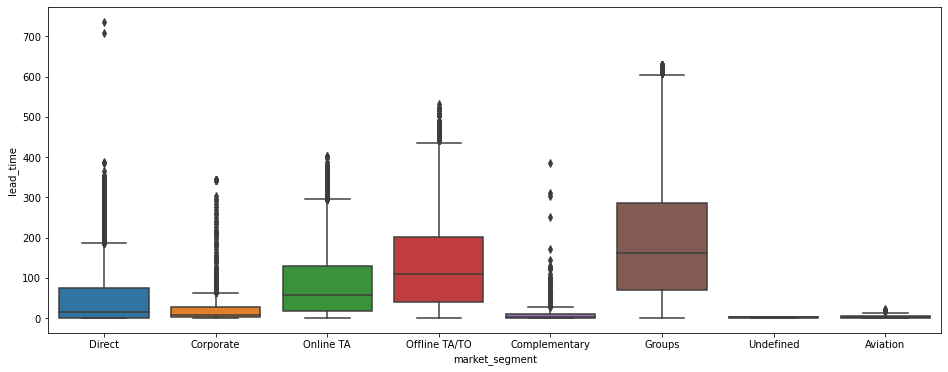

In [56]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='market_segment', y='lead_time')

From the box plot we can say there are lot of outliers present in these columns. But we cannot go ahead and remove them as such because they might contain some importannce which might influence the model. so further investigation must be made.

# FEATURE ENGINEERING

In [57]:
#Here we are assigning the months with numerical values

month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
df.arrival_date_month = df.arrival_date_month.map(month_map).astype(int)

In [58]:
# Joining the values of dates to calculate the duration of stay and assignming them numericals

df['arrival_date'] = df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['stay_duration'] = df['reservation_status_date'] - df['arrival_date']
df['stay_duration'] = df['stay_duration'] / np.timedelta64(1, 'D')
df['stay_duration'] = df['stay_duration'].astype(int)
for i in range(len(df)):
    if df.loc[i, 'stay_duration']<0:
        df.at[i, 'stay_duration'] = -1
        
# I have used this snippet code from kaggle because the stay_duration variable seems to have a lot of impact on the model performance(refer feature importance below)

In [59]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(roomChange, axis=1)

In [60]:
df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

# Question 2B(ii)
# Handling missing values

In [61]:
df['children'] = df['children'].fillna(0)
df['offspring'] = (df['children'] + df['babies']).astype(int)

In [62]:
# Replacing the missing values with mode of the column
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(df['agent'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)

# Question 2B(i)
# One-hot encoding

Here i am converting the categorical variables into numerical ones by get dummies method.

In [63]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel']
for item in var:
    df[item] = lb.fit_transform(df[item])
df = pd.get_dummies(df, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel'])

# Question 2D(ii)

By running forward selection i have identified few columns which does not have a significant impact on the outcome. So removing these columns or storing these data in a cold storage might help the company to save some money and make the model simpler.

In [64]:
# Dropping columns

df.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date', 'country'], axis=1, inplace=True)

In [65]:
df.head().T

,0,1,2,3,4
is_canceled,0.0,0.0,0.0,0.0,0.0
lead_time,342.0,737.0,7.0,13.0,14.0
arrival_date_year,2015.0,2015.0,2015.0,2015.0,2015.0
arrival_date_month,7.0,7.0,7.0,7.0,7.0
arrival_date_week_number,27.0,27.0,27.0,27.0,27.0
arrival_date_day_of_month,1.0,1.0,1.0,1.0,1.0
stays_in_weekend_nights,0.0,0.0,0.0,0.0,0.0
stays_in_week_nights,0.0,0.0,1.0,1.0,2.0
adults,2.0,2.0,1.0,1.0,2.0
children,0.0,0.0,0.0,0.0,0.0


# Question 1
# Classification Models

In [66]:
x1 = df.drop(['is_canceled'], axis=1)
y1 = df['is_canceled']

# Split data
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20)

In [67]:
# Question 2B(iv)
# Data scaling and Normalization

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)


#std_scaler = StandardScaler()
#std_scaler.fit(X_train)
#X_train_std = std_scaler.transform(X_train)
#X_test_std = std_scaler.transform(X_test)


#Note: I tried normalizing the data but obtained low scores

# Normalize Data
#X_train_means = X_train.mean()
#X_train_std = X_train.std()
#X_train = (X_train - X_train_means)/X_train_std
#X_test = (X_test - X_train_means)/X_train_std


# Logistic Regression

## Question 2C
## Summary

**1. Exploratory data analysis**

EDA is the first step in every project which involves data. The data we obtain from the real world is always messy and not clean which might influence the results or the inferences we can obtain from the dataset. I have used the same exploratory data analysis for the both the models. 

**2. Visualizations**

Visualizations and pictorial representations are the best way to tell a story. I have used a variety of graphs in order to interpret the effect of the data on the response variable. This helps us to find out how important few variables are and how few variables have no effect on the target.

**3. Feature engineering**

After completing the first two steps we will get some insights of how the dataset is and if we need to make any changes to the dataset. This step is called feature engineering. This is one of the most important steps as the entire performance of the model will be impacted by the operations performed here. I have used few of the techniques to handle missing values and covert categorial values to numerical using one-hot encoding.

**4. Splittig the dataset**

After all the EDA and data manipulation is done, now it is time to split the dataset into training and testing data. 80 percentage of the entire dataset is used in order to train the model. 20 percentage of the entire dataset is used as testing data, ie. the data which is shown to the model after it has been trained in order to check if the prediction of the model is good.

**5. Fitting the data into LOGISTIC REGRESSION model(model preparation**

   1. Once the data is fit into the logistic regression model the **Sigmoid** function is used to obtain the **probability** between the number of booking cancelled and not cancelled bookings.
   2. With the probability obtained i can calculate the likelihood of observing a cancelled booking and then calculate the likelihood of observing a not cancelled booking. We repeat this process several times to obtain the likelihood of the entire dataset.
   3. In this particular logistic regression model i am running max iterations of 500.
   4. The predicted probabilities are used to plot the confussion matrix and the metrics
   5. We also change the probability threshold of the model in order to increase the sensitivity of the classifier
   6. Since the target variable is also **binary** i can againg confirm the use of logistic regression.
   7. There is also the **cost  function** which is used to quantify the difference or the errors between the expected and the predicted values.
   
**6. Changing the probability threshold**

The probability **threshold** for a logistic regression model is set at **0.5** by default. But based on the **business needs** this value needs to be altered. In my model i have reduced the threshold value to 0.3 because lesser the threshold value, greater the sensitivity of the model. I have given a clear explanation of why i have increased sensitivity below. 

**7. Analyzing the metrics**

Now in order to test our model and measure their performance various metrics are used. Along with them io have also plotted the confusion matrix in order to check type 1 and type 2 errors and make sure the process is not **overfitting or underfitting**. I have also used **cross validation** score and **model run time** in order to evaluate the performance. The various metrics i have used to selct my winning model is given in detail in the conclusion section below.

**8. Decision making with business intelligence**

After running the model and getting accurate predictions, one might feel the tough part is done. But the most difficult part of data mining and analytics is the process of explaining the inferences to the executives(**Story telling**). This will be the final step of the process. I have selected my champion model based on my analysis and i have given a clear explanation of the conclusions below.

In [68]:
# Fitting the model
start_time = time.time()
model1 = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)

# Question 2B(v) Cross validation - I have done this for all the models 
scores = cross_val_score(model1, X_train_mm, y_train, cv=5)
model1_pred = model1.predict(X_test_mm)
print("Model run time")
print("--- %s seconds ---" % (time.time() - start_time))

Model run time
--- 20.166541576385498 seconds ---


## Question 2B(vi)
## Probability Threshold determination

Ans: If the threshold value is high then there are more False Negatives and if the threshold value is low then there will be more False Positives. So according to the business requiremennt, here i am decreasing the threshold to 0.3 for predicting the number of booking cancellations in order to increase the sensitivity of the classifier.

In [69]:
y_pred_prob = model1.predict_proba(X_test_mm)[:,1]
y_pred_class1 = binarize([y_pred_prob],threshold=0.5)[0]

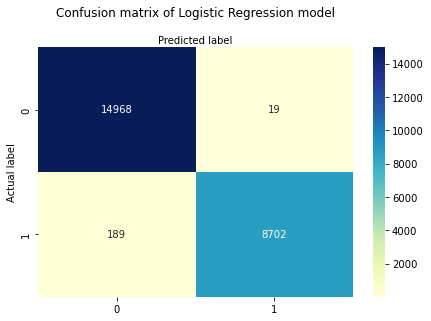

In [70]:
cm1=confusion_matrix(y_test,y_pred_class1)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(cm1, annot=True, cmap="YlGnBu" ,fmt='g') # cm1 is the confusion matrix for first model (Logistic Regression)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Logistic Regression model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [71]:
# Metrics computed from a confusion matrix

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_class1).round(4))
print("Precision:",metrics.precision_score(y_test, y_pred_class1).round(4))
print("Recall:",metrics.recall_score(y_test, y_pred_class1).round(4))
print("F1 Score:", metrics.f1_score(y_test,y_pred_class1).round(4))
print("Error Rate:",(1 - metrics.accuracy_score(y_test, y_pred_class1)).round(4))

Average cross validation score: 0.990
Accuracy: 0.9913
Precision: 0.9978
Recall: 0.9787
F1 Score: 0.9882
Error Rate: 0.0087


In [72]:
y_pred_prob = model1.predict_proba(X_test_mm)[:,1]
y_pred_class1 = binarize([y_pred_prob],threshold=0.3)[0]

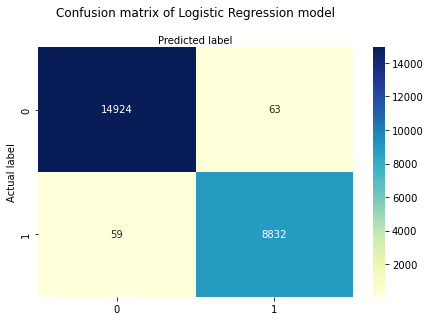

In [73]:
cm1=confusion_matrix( y_test, y_pred_class1)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(cm1, annot=True, cmap="YlGnBu" ,fmt='g') # cm1 is the confusion matrix for first model (Logistic Regression)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Logistic Regression model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [74]:
# Metrics computed from a confusion matrix

print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_class1).round(4))
print("Precision:",metrics.precision_score(y_test, y_pred_class1).round(4))
print("Recall:",metrics.recall_score(y_test, y_pred_class1).round(4))
print("F1 Score:", metrics.f1_score(y_test,y_pred_class1).round(4))
print("Error Rate:",(1 - metrics.accuracy_score(y_test, y_pred_class1)).round(4))

Average cross validation score: 0.990
Accuracy: 0.9949
Precision: 0.9929
Recall: 0.9934
F1 Score: 0.9931
Error Rate: 0.0051


# Decision Tree

## Question 2C
## Summary

**1. Exploratory data analysis**

EDA is the first step in every project which involves data. The data we obtain from the real world is always messy and not clean which might influence the results or the inferences we can obtain from the dataset. I have used the same exploratory data analysis for the both the models. 

**2. Visualizations**

Visualizations and pictorial representations are the best way to tell a story. I have used a variety of graphs in order to interpret the effect of the data on the response variable. This helps us to find out how important few variables are and how few variables have no effect on the target.

**3. Feature engineering**

After completing the first two steps we will get some insights of how the dataset is and if we need to make any changes to the dataset. This step is called feature engineering. This is one of the most important steps as the entire performance of the model will be impacted by the operations performed here. I have used few of the techniques to handle missing values and covert categorial values to numerical using one-hot encoding.

**4. Splittig the dataset**

After all the EDA and data manipulation is done, now it is time to split the dataset into training and testing data. 80 percentage of the entire dataset is used in order to train the model. 20 percentage of the entire dataset is used as testing data, ie. the data which is shown to the model after it has been trained in order to check if the prediction of the model is good.

**5. Fitting the data into DECISION TREE model(model preparation)**
   1. When the data is fitted into the decision tree algorithm, the **Root node** is selected. All the independent variables are candidates for the root node.
   2. The root node selection is based on **Information gain** and **Gini impurity** which works internally on the backend of the model.
   3. This root node will further split into a number of nodes which are called as leaf nodes using which the tree makes its decisions.(refer the tree graph)
   3. Now when new data is fed into the tree model, it will use the same pattern to identify the category.
   4. In order to avoid **overfitting** the decision tree algorithm uses a method called **pruning**
   5. Since i am able to get efficient results i am not undertaking the process of **pruning**. But it can be used to reduce the number of branches and increase the efficiency of the model.
   6. We can also contro the number of leaves produced by puttting a parameter called **max_depth**
   

**6. Feature importance and tree graph**

The feature importance plot helps us to identify which variable has the highest impact on the target variable. I have also plotted the decision tree plot and made some interpretations based on the colour below.

**7. Analyzing the metrics**

Now in order to test our model and measure their performance various metrics are used. Along with them io have also plotted the confusion matrix in order to check type 1 and type 2 errors and make sure the process is not **overfitting or underfitting**. I have also used **cross validation** score and **model run time** in order to evaluate the performance. The various metrics i have used to selct my winning model is given in detail in the conclusion section below.

**8. Decision making with business intelligence**

After running the model and getting accurate predictions, one might feel the tough part is done. But the most difficult part of data mining and analytics is the process of explaining the inferences to the executives(**Story telling**). This will be the final step of the process. I have selected my champion model based on my analysis and i have given a clear explanation of the conclusions below.

In [75]:
# Fitting the model
start_time = time.time()
model2 = DecisionTreeClassifier().fit(X_train_mm, y_train)
scores2 = cross_val_score(model2, X_train_mm, y_train, cv=5)
model2_pred = model2.predict(X_test_mm)
print("Model run time")
print("--- %s seconds ---" % (time.time() - start_time))

Model run time
--- 2.17494797706604 seconds ---


# Feature importance
This plot shows that the variable stay_duration has a high impact on the target variable.

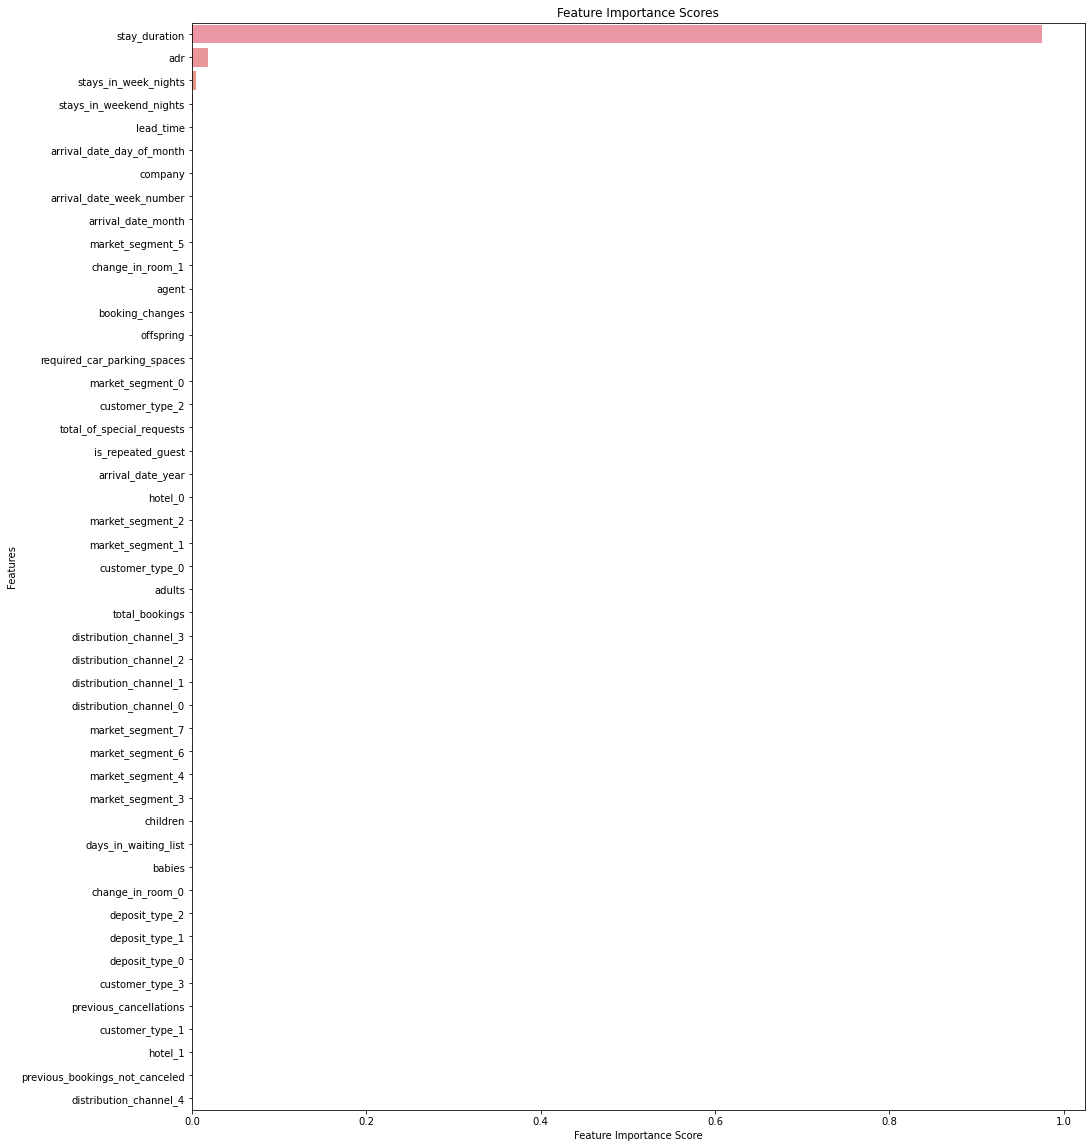

In [76]:
plt.figure(figsize=(16, 20))
feature_imp = pd.Series(model2.feature_importances_,index = X_train.columns).sort_values(ascending = False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

# Tree plot
From the below decision tree i can see orange, light orange and white are representing the bookings which are not cancelled. The colours Blue and Light blue represents the bookings which are cancelled.

<Figure size 7200x4800 with 0 Axes>

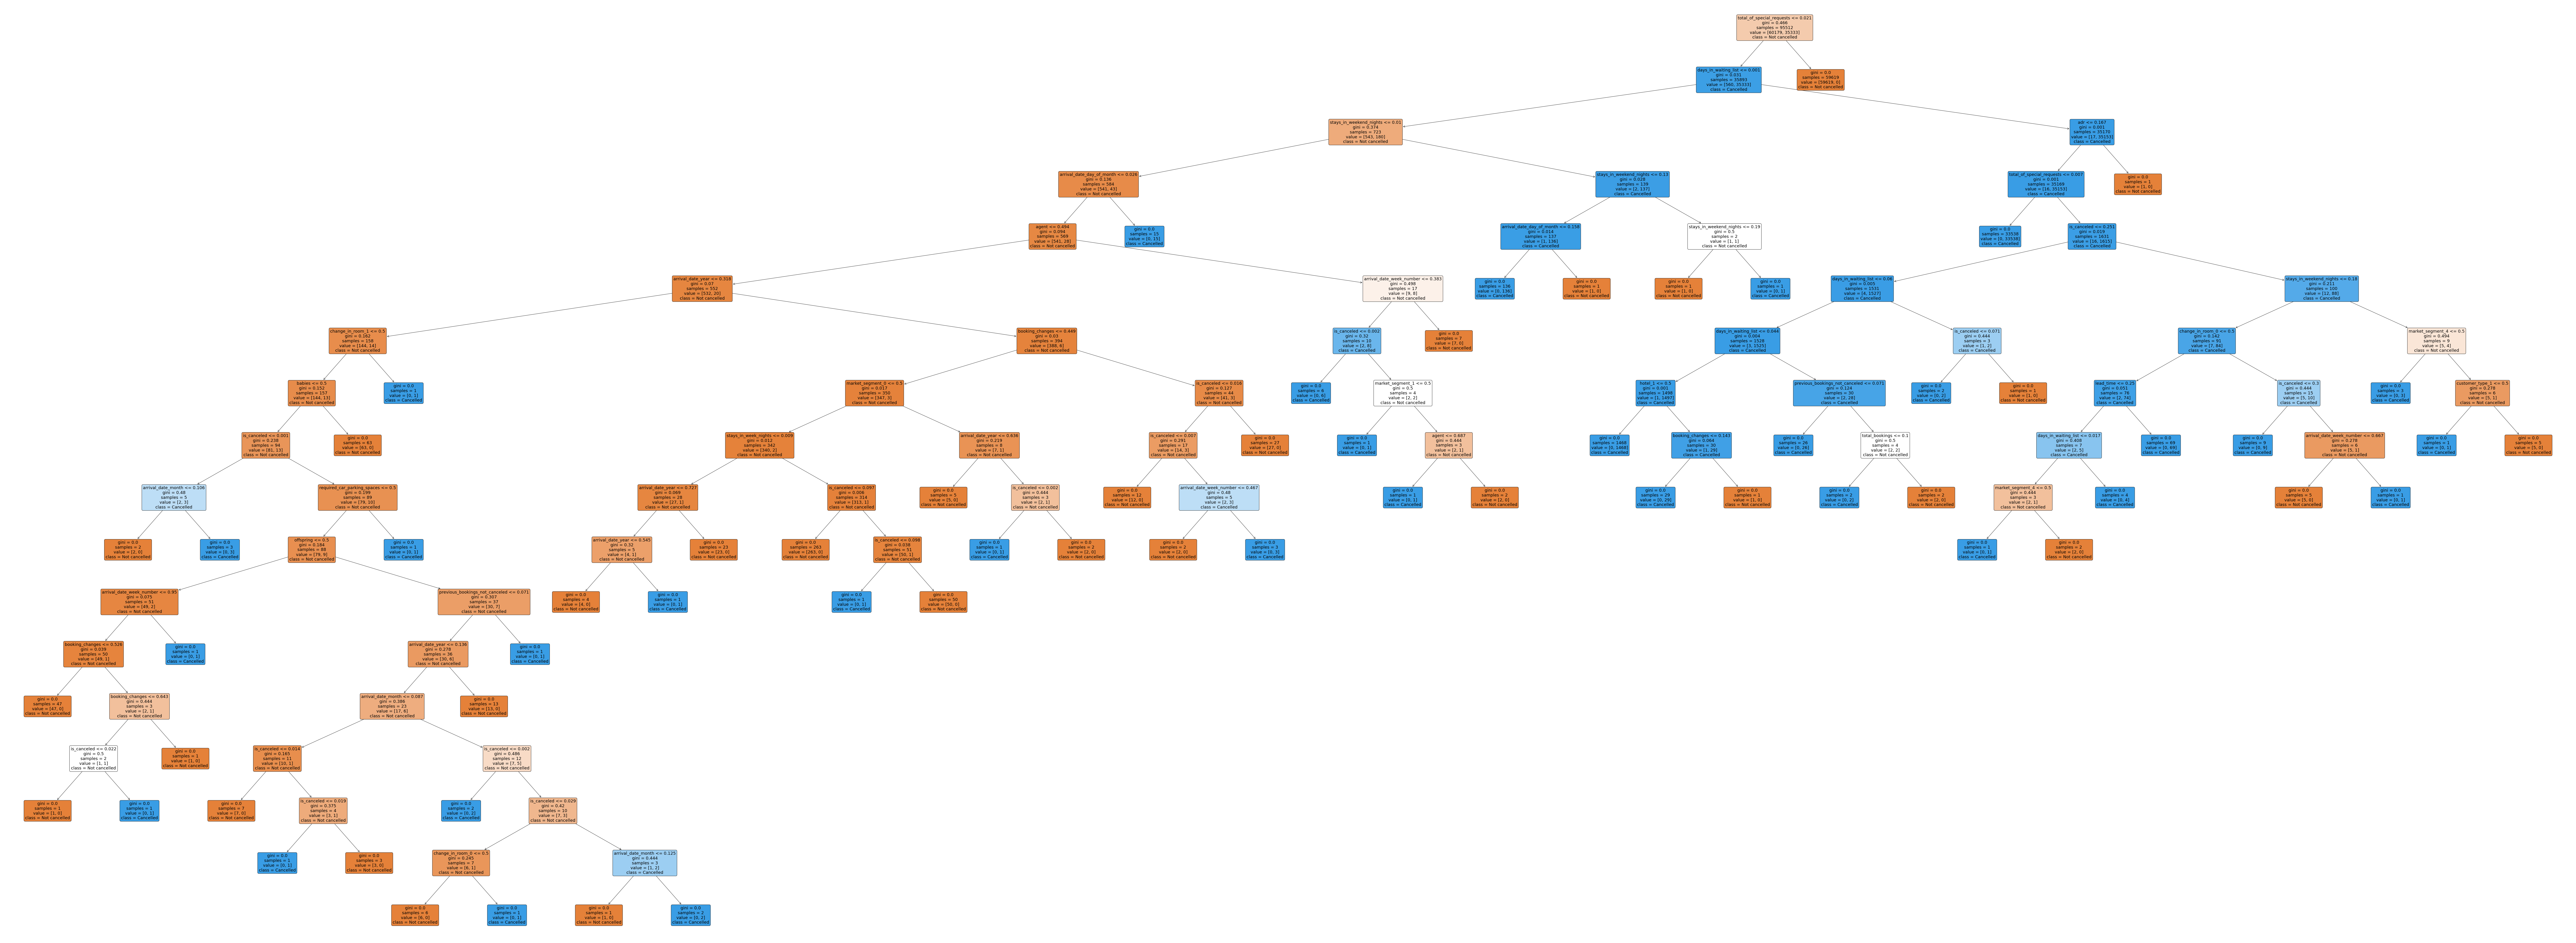

In [77]:
plt.figure(dpi=1200)
fig = plt.figure(figsize=(200,75))
plot_tree(model2,
          filled=True,
          rounded=True,
          class_names=['Not cancelled', 'Cancelled'],
          feature_names=df.columns
         );
plt.show()

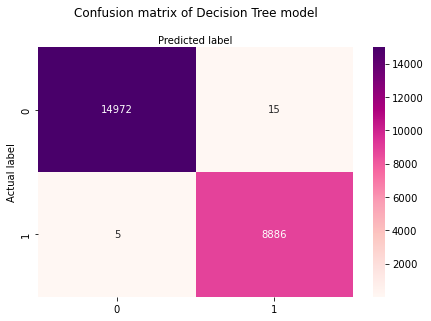

In [78]:
cm2=confusion_matrix(y_test, model2_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(cm2, annot=True, cmap="RdPu" ,fmt='g') # cm2 is the confusion matrix for second model (Decision tree)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Decision Tree model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [79]:
# Metrics computed from a confusion matrix
print("Average cross validation score: {:.3f}".format(scores2.mean()))
print("Accuracy:", metrics.accuracy_score(y_test,model2_pred).round(4))
print("Precision:",metrics.precision_score(y_test, model2_pred).round(4))
print("Recall:",metrics.recall_score(y_test, model2_pred).round(4))
print("F1 Score:", metrics.f1_score(y_test,model2_pred).round(4))
print("Error Rate:",(1 - metrics.accuracy_score(y_test, model2_pred)).round(4))

Average cross validation score: 0.999
Accuracy: 0.9992
Precision: 0.9983
Recall: 0.9994
F1 Score: 0.9989
Error Rate: 0.0008


# Question 2D(iv)

From all the confusion matrix and the metrics obtained above i can see that there is no overfitting or underfitting and the model is performing as expected when unseen data is provided. So i can be very confident that the model can perform well when unseen data is provided 

# ROC curve

This plot helps in comparing the performance of the models

C:\Users\kjosep14\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kjosep14\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


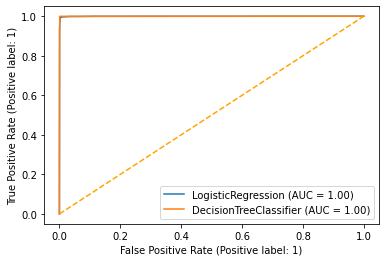

In [80]:
disp=plot_roc_curve(model1, X_test_mm, y_test)
plot_roc_curve(model2, X_test_mm, y_test, ax=disp.ax_)
plt.plot([0,1], [0,1], color='orange', linestyle='--');

# Question 2D
# Conclusion

### 1. Comparison of all models

Ans: After running all the models, i have obtained various metrics which i have documend as follows:

**Logistic Regression:**
1. Average cross validation score: 0.990
2. Accuracy: 0.9951
3. Precision: 0.994
4. Recall: 0.9929
5. F1 Score: 0.9934
6. Error Rate: 0.0049
7. Model run time : 22.00707173347473 seconds


**Decision Tree:**
1. Average cross validation score: 0.994
2. Accuracy: 0.9946
3. Precision: 0.9855
4. Recall: 1.0
5. F1 Score: 0.9927
6. Error Rate: 0.0054
7. Model run time: 0.8603272438049316 seconds


Now with the above obtained metrics we can try to identify the model which might give us the best results. 

### 2. Final selection of ‘winning’ method
Ans: I have used recall, F1 score and the model run time as my measures to examine the performance of the models.

Recall is defined as the fraction of samples from a class which are correctly predicted by the model. I chose Recall becaue it is the rate of true positives. According to the business requirement it is better to find out the number of cancellations rather than prediciting the number of bookings which are not cancelled. Finding the frst option will help the company to identify the number of hotels which might become vacant. This will also help to improve the business by quicky assigning the hotels which are cancelled to new clients. Further more even though my accuracy score is good, that alone cannot be considered as a primary measure to examine the performance.

There are many applications in which both recall and precision are important. F1 score combines both precision and recall, which is the harmonic mean of precision and recall. This can be used in order to avoid trade off between precision and recall.

One more factor which can be used to measure the efficiency of the model is model run time. This can also play a major factor in the financial aspects of the business and at the same time how much time we need in between getting results.

The following are the results for my 2 models

**Logistic Regression:**
1. Accuracy: 0.9951
2. Recall: 0.9929
3. F1 Score: 0.9934
4. Model run time : 22.00707173347473 seconds


**Decision Tree:**
1. Accuracy: 0.9946
2. Recall: 1.0
3. F1 Score: 0.9927
4. Model run time: 0.8603272438049316 seconds

So, from the above obtained results i want to select **Decision tree** as my champion model because it has an accuracy of 0.99, a recall score of 1.0 an F1 score of 0.99 and the model run time is 0.86 seconds. Eventhough the other models also have good performance, the model run time helped me pick decision tree over other models since running ML models at scale costs money. From the above explanations i can confirm my model is highly accurate and highly efficient.